In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import sqlite3

import seaborn as sns
from scipy.stats import shapiro
from scipy import stats

from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Подготовка данных для выявления данных кто участвовал в рекламной компании

In [6]:
# Открытие файла для чтения
with open('ids_first_company_positive.txt', 'r') as file:
# Чтение содержимого файла
    content = file.read()

In [7]:
content

'Ids of positive AB people 88128,171960,142117,114589,146123,94080,170921,63395,113075,144095,160909,28409,564,73304,17325,157790,73503,34595,27363,93721,53448,172382,139930,125612,123890,44798,98385,101786,19213,63220,34646,16476,166187,140056,161638,107475,97026,16112,115991,124787,156828,126921,141119,115620,140837,149500,44921,85789,22927,9984,32189,76510,70726,95757,91876,66688,87987,139301,121669,158721,96365,172608,135512,9374,81980,172855,164024,24755,19656,100382,64244,164113,95935,57430,86793,146767,85744,109125,22588,18792,82490,78167,9575,80270,24922,13188,131219,135219,125439,155222,54407,112736,91207,81815,17215,136729,34887,34327,91299,147422,33146,10367,72703,146648,142790,162520,64215,53979,60330,29616,46917,94944,37777,842,173346,114329,23065,93730,95418,76520,121995,49630,35415,169037,122653,46979,127692,69577,103191,137483,138630,25626,102468,30823,142371,90951,13321,122316,42861,166060,114482,120726,77077,110314,110119,73184,130753,64033,72535,58951,76522,57385,862

In [8]:
import re
cleaned_text3 = re.sub(r'[a-zA-Zа-яА-Я]', '', content)  # Удаление букв

In [9]:
# Разделители: запятая, точка с запятой, новая строка и пробел
delimiters = (",", ";", "\n", " ")

# Разбиваем текст на подстроки, используя все указанные разделители
result3 = re.split('|'.join(map(re.escape, delimiters)), cleaned_text3)

In [10]:
# датафрейм для участников из файла positive
df7 = pd.DataFrame(result3[5:-2])
df7

,0
0,88128
1,171960
2,142117
3,114589
4,146123
...,...
5026,20387
5027,61130
5028,18359
5029,87690


In [11]:
df7 = df7.rename(columns={0:'id'})[['id']]
df7

,id
0,88128
1,171960
2,142117
3,114589
4,146123
...,...
5026,20387
5027,61130
5028,18359
5029,87690


In [12]:
df7['id'] = pd.to_numeric(df7['id'], errors='coerce')

In [13]:
# Удаление строк, которые не являются числами
df7 = df7.dropna(subset=['id'])

print(df7)

            id
0      88128.0
1     171960.0
2     142117.0
3     114589.0
4     146123.0
...        ...
5026   20387.0
5027   61130.0
5028   18359.0
5029   87690.0
5030   81928.0

[5022 rows x 1 columns]


In [14]:
value_to_remove = 0

df7 = df7[(df7['id'] != value_to_remove)]

In [15]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5030
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5020 non-null   float64
dtypes: float64(1)
memory usage: 78.4 KB


In [16]:
# Открытие файла для чтения
with open('ids_first_company_negative.txt', 'r') as file2:
# Чтение содержимого файла
    content2 = file2.read()

In [17]:
import re
cleaned_text2 = re.sub(r'[a-zA-Zа-яА-Я]', '', content2)  # Удаление букв

In [18]:
# Разделители: запятая, точка с запятой, новая строка и пробел
delimiters2 = (",", ";", "\n", " ")

# Разбиваем текст на подстроки, используя все указанные разделители
result2 = re.split('|'.join(map(re.escape, delimiters2)), cleaned_text2)

In [19]:
# датафрейм для участников из файла negative
df8 = pd.DataFrame(result2[5:-2])
df8

,0
0,82450
1,63400
2,7138
3,102118
4,153511
...,...
6049,89121
6050,161445
6051,162570
6052,92547


In [20]:
df8 = df8.rename(columns={0:'id'})[['id']]
df8

,id
0,82450
1,63400
2,7138
3,102118
4,153511
...,...
6049,89121
6050,161445
6051,162570
6052,92547


In [21]:
df8['id'] = pd.to_numeric(df8['id'], errors='coerce')

In [22]:
# Удаление строк, которые не являются числами
df8 = df8.dropna(subset=['id'])

print(df8)

            id
0      82450.0
1      63400.0
2       7138.0
3     102118.0
4     153511.0
...        ...
6049   89121.0
6050  161445.0
6051  162570.0
6052   92547.0
6053  120689.0

[5019 rows x 1 columns]


In [23]:
value_to_remove = 0

df8 = df8[(df8['id'] != value_to_remove)]

In [24]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5019 entries, 0 to 6053
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5019 non-null   float64
dtypes: float64(1)
memory usage: 78.4 KB


# чтение файлов для проведение работы

In [73]:
df = pd.read_csv('personal_data.csv')
df

,id,age,education,city,country
0,101492,32,среднее,1188,32
1,42690,20,высшее,1134,32
2,113001,27,среднее,1187,32
3,163654,49,высшее,1160,32
4,69523,44,среднее,1137,32
...,...,...,...,...,...
15743,135183,44,среднее,1134,32
15744,125993,46,среднее,1134,32
15745,167019,71,среднее,1134,32
15746,116355,32,среднее,1188,32


In [74]:
df = df.sort_values('id')
df


,id,age,education,city,country
3074,3,31,среднее,1134,32
8735,33,34,среднее,1167,32
20,42,46,среднее,1134,32
7664,44,36,среднее,1181,32
7601,53,31,среднее,1188,32
...,...,...,...,...,...
13069,177942,23,высшее,1134,32
8478,177955,24,высшее,1193,32
3766,177968,49,высшее,1157,32
5304,177984,43,среднее,1204,32


In [75]:
df.isna().sum()

id           0
age          0
education    0
city         0
country      0
dtype: int64

In [76]:
dbfile = 'shop_database.db'
conn = sqlite3.connect(dbfile)
cursor = conn.cursor()

In [77]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Table Name: {cursor.fetchall()}")

Table Name: [('purchases',), ('personal_data_coeffs',), ('personal_data',)]


In [78]:
query = "SELECT \
             *\
             FROM \
                 personal_data_coeffs \
              ;"

In [79]:
df1 = pd.read_sql_query(query, conn)

In [80]:
df1

,id,lbt_coef,ac_coef,sm_coef,personal_coef
0,0,5.078678,-0.307147,0.959027,0.5072
1,3,7.764766,-0.030225,0.794720,0.4304
2,4,4.569378,0.063693,0.820892,0.5072
3,6,8.150379,0.075200,0.836140,0.4304
4,7,5.188231,-0.000134,0.944113,0.5072
...,...,...,...,...,...
104984,177998,4.740988,0.364797,1.165888,0.5072
104985,177999,7.303172,0.431899,1.317100,0.4304
104986,178001,5.241579,0.430391,0.356182,0.2576
104987,178002,7.542436,-0.290921,0.800338,0.4304


In [81]:
df1.isna().sum()

id               0
lbt_coef         0
ac_coef          0
sm_coef          0
personal_coef    0
dtype: int64

In [82]:
query2 = "SELECT \
             *\
             FROM \
                 purchases \
              ;"

In [83]:
df2 = pd.read_sql_query(query2, conn)

In [84]:
df2

,id,product,colour,cost,product_sex,base_sale,dt
0,0,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7
1,0,Стол Outventure,зелёный,1499,NaN,0,37
2,0,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
3,3,Бутсы мужские GSD Astro,белый,1599,1.0,0,13
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,мультицвет,7199,NaN,0,27
...,...,...,...,...,...,...,...
786255,178004,Полуботинки мужские Ascot Vortex,хаки/черный,7999,1.0,0,12
786256,178004,Кроссовки мужские Nike Air Max 90,черный/серый,24299,1.0,0,13
786257,178004,Кроссовки мужские Nike Air Max 90,черный/серый,24299,1.0,0,20
786258,178004,Пакет,коричневый,12,NaN,0,20


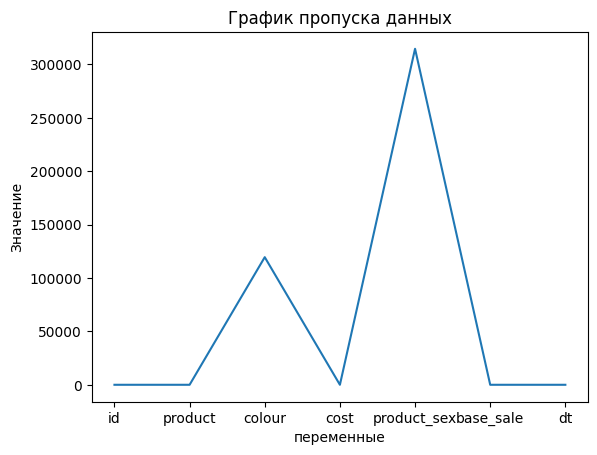

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем график с использованием sns.lineplot()
sns.lineplot(data=df21)

# Добавляем подпись к оси x
plt.xlabel('переменные')

# Добавляем подпись к оси y
plt.ylabel('Значение')

# Добавляем название графика
plt.title('График пропуска данных')

# Отображаем график
plt.show()

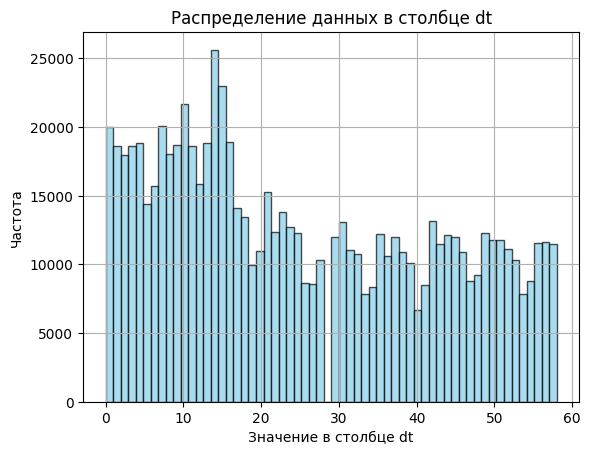

In [86]:
# Строим гистограмму данных в столбце dt
plt.hist(df2.dt, bins=60, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Значение в столбце dt')
plt.ylabel('Частота')
plt.title('Распределение данных в столбце dt')
plt.grid(True)
plt.show()

In [87]:
df21 = df2.isna().sum()
df21

id                  0
product             0
colour         119524
cost                0
product_sex    314712
base_sale           0
dt                  0
dtype: int64

In [88]:
query3 = "SELECT \
             *\
             FROM \
                 personal_data \
              ;"

In [89]:
df3 = pd.read_sql_query(query3, conn)
conn.close()

In [90]:
df3.isna().sum()

id           0
gender       0
age          0
education    0
city         0
country      0
dtype: int64

In [91]:
df4 = df3.sort_values('id')
df4

,id,gender,age,education,city,country
0,0,0,36,среднее,1201,32
1,4,0,35,среднее,1134,32
2,6,1,52,среднее,1188,32
3,7,0,37,среднее,1198,32
4,9,0,48,среднее,1134,32
...,...,...,...,...,...,...
89236,177997,0,28,среднее,1134,32
89237,177998,0,32,среднее,1201,32
89238,177999,1,34,среднее,1163,32
89239,178001,1,5,среднее,1208,32


In [92]:
df3 = df3[df3['country'] == 32]
df3

,id,gender,age,education,city,country
0,0,0,36,среднее,1201,32
1,4,0,35,среднее,1134,32
2,6,1,52,среднее,1188,32
3,7,0,37,среднее,1198,32
4,9,0,48,среднее,1134,32
...,...,...,...,...,...,...
89236,177997,0,28,среднее,1134,32
89237,177998,0,32,среднее,1201,32
89238,177999,1,34,среднее,1163,32
89239,178001,1,5,среднее,1208,32


# удаление пропусков и приведение название продукта к одному формату

In [93]:
df5 = df2[~df2['colour'].isna()]
df5

,id,product,colour,cost,product_sex,base_sale,dt
0,0,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7
1,0,Стол Outventure,зелёный,1499,NaN,0,37
2,0,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
3,3,Бутсы мужские GSD Astro,белый,1599,1.0,0,13
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,мультицвет,7199,NaN,0,27
...,...,...,...,...,...,...,...
786255,178004,Полуботинки мужские Ascot Vortex,хаки/черный,7999,1.0,0,12
786256,178004,Кроссовки мужские Nike Air Max 90,черный/серый,24299,1.0,0,13
786257,178004,Кроссовки мужские Nike Air Max 90,черный/серый,24299,1.0,0,20
786258,178004,Пакет,коричневый,12,NaN,0,20


In [94]:
df5.isna().sum()

id                  0
product             0
colour              0
cost                0
product_sex    271849
base_sale           0
dt                  0
dtype: int64

In [95]:
df6 = df5[df5['product_sex'].isna()]
df6

,id,product,colour,cost,product_sex,base_sale,dt
1,0,Стол Outventure,зелёный,1499,NaN,0,37
2,0,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,мультицвет,7199,NaN,0,27
7,4,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,NaN,0,0
8,4,Шлем FILA NRK FUN,белый,4999,NaN,0,0
...,...,...,...,...,...,...,...
786233,177999,"Велосипед городской Stern Urban 28"", 2022",серый,25199,NaN,1,39
786234,177999,Велокресло детское Polisport Bilby Junior,серый,5499,NaN,0,39
786235,177999,Палатка 3-местная Outventure Cadaques 3,темно-зелёный,7999,NaN,0,39
786245,178001,Мини-степпер Torneo Massage S-231,серый,4999,NaN,0,13


In [96]:
df6.fillna(2, inplace=True)
df6

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,id,product,colour,cost,product_sex,base_sale,dt
1,0,Стол Outventure,зелёный,1499,2.0,0,37
2,0,Набор Outventure: стол + 4 стула,бежевый,4799,2.0,0,37
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,мультицвет,7199,2.0,0,27
7,4,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,2.0,0,0
8,4,Шлем FILA NRK FUN,белый,4999,2.0,0,0
...,...,...,...,...,...,...,...
786233,177999,"Велосипед городской Stern Urban 28"", 2022",серый,25199,2.0,1,39
786234,177999,Велокресло детское Polisport Bilby Junior,серый,5499,2.0,0,39
786235,177999,Палатка 3-местная Outventure Cadaques 3,темно-зелёный,7999,2.0,0,39
786245,178001,Мини-степпер Torneo Massage S-231,серый,4999,2.0,0,13


In [97]:
df6['colour'] = df6.apply(lambda x: x.colour.split('/') , axis=1)
df6

C:\Users\user\AppData\Local\Temp\ipykernel_7536\1242701925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['colour'] = df6.apply(lambda x: x.colour.split('/') , axis=1)


,id,product,colour,cost,product_sex,base_sale,dt
1,0,Стол Outventure,[зелёный],1499,2.0,0,37
2,0,Набор Outventure: стол + 4 стула,[бежевый],4799,2.0,0,37
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,[мультицвет],7199,2.0,0,27
7,4,Роликовые коньки детские Roces Orlando III,"[черный, розовый]",9199,2.0,0,0
8,4,Шлем FILA NRK FUN,[белый],4999,2.0,0,0
...,...,...,...,...,...,...,...
786233,177999,"Велосипед городской Stern Urban 28"", 2022",[серый],25199,2.0,1,39
786234,177999,Велокресло детское Polisport Bilby Junior,[серый],5499,2.0,0,39
786235,177999,Палатка 3-местная Outventure Cadaques 3,[темно-зелёный],7999,2.0,0,39
786245,178001,Мини-степпер Torneo Massage S-231,[серый],4999,2.0,0,13


In [98]:
df6['number_of_colors'] = df6['colour'].apply(lambda x: len(x))
df6

C:\Users\user\AppData\Local\Temp\ipykernel_7536\1745002902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['number_of_colors'] = df6['colour'].apply(lambda x: len(x))


,id,product,colour,cost,product_sex,base_sale,dt,number_of_colors
1,0,Стол Outventure,[зелёный],1499,2.0,0,37,1
2,0,Набор Outventure: стол + 4 стула,[бежевый],4799,2.0,0,37,1
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,[мультицвет],7199,2.0,0,27,1
7,4,Роликовые коньки детские Roces Orlando III,"[черный, розовый]",9199,2.0,0,0,2
8,4,Шлем FILA NRK FUN,[белый],4999,2.0,0,0,1
...,...,...,...,...,...,...,...,...
786233,177999,"Велосипед городской Stern Urban 28"", 2022",[серый],25199,2.0,1,39,1
786234,177999,Велокресло детское Polisport Bilby Junior,[серый],5499,2.0,0,39,1
786235,177999,Палатка 3-местная Outventure Cadaques 3,[темно-зелёный],7999,2.0,0,39,1
786245,178001,Мини-степпер Torneo Massage S-231,[серый],4999,2.0,0,13,1


In [99]:
df6['product1'] = df6['product'].apply(lambda x: x.split(' '))
df6

C:\Users\user\AppData\Local\Temp\ipykernel_7536\815295948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['product1'] = df6['product'].apply(lambda x: x.split(' '))


,id,product,colour,cost,product_sex,base_sale,dt,number_of_colors,product1
1,0,Стол Outventure,[зелёный],1499,2.0,0,37,1,"[Стол, Outventure]"
2,0,Набор Outventure: стол + 4 стула,[бежевый],4799,2.0,0,37,1,"[Набор, Outventure:, стол, +, 4, стула]"
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,[мультицвет],7199,2.0,0,27,1,"[Мяч, футбольный, PUMA, TEAMFINAL, 21.2, FIFA,..."
7,4,Роликовые коньки детские Roces Orlando III,"[черный, розовый]",9199,2.0,0,0,2,"[Роликовые, коньки, детские, Roces, Orlando, III]"
8,4,Шлем FILA NRK FUN,[белый],4999,2.0,0,0,1,"[Шлем, FILA, NRK, FUN]"
...,...,...,...,...,...,...,...,...,...
786233,177999,"Велосипед городской Stern Urban 28"", 2022",[серый],25199,2.0,1,39,1,"[Велосипед, городской, Stern, Urban, 28"",, 2022]"
786234,177999,Велокресло детское Polisport Bilby Junior,[серый],5499,2.0,0,39,1,"[Велокресло, детское, Polisport, Bilby, Junior]"
786235,177999,Палатка 3-местная Outventure Cadaques 3,[темно-зелёный],7999,2.0,0,39,1,"[Палатка, 3-местная, Outventure, Cadaques, 3]"
786245,178001,Мини-степпер Torneo Massage S-231,[серый],4999,2.0,0,13,1,"[Мини-степпер, Torneo, Massage, S-231]"


In [100]:
df6['product1'] = df6['product1'].apply(lambda x: x[0])
df6


C:\Users\user\AppData\Local\Temp\ipykernel_7536\366353466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['product1'] = df6['product1'].apply(lambda x: x[0])


,id,product,colour,cost,product_sex,base_sale,dt,number_of_colors,product1
1,0,Стол Outventure,[зелёный],1499,2.0,0,37,1,Стол
2,0,Набор Outventure: стол + 4 стула,[бежевый],4799,2.0,0,37,1,Набор
4,3,Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...,[мультицвет],7199,2.0,0,27,1,Мяч
7,4,Роликовые коньки детские Roces Orlando III,"[черный, розовый]",9199,2.0,0,0,2,Роликовые
8,4,Шлем FILA NRK FUN,[белый],4999,2.0,0,0,1,Шлем
...,...,...,...,...,...,...,...,...,...
786233,177999,"Велосипед городской Stern Urban 28"", 2022",[серый],25199,2.0,1,39,1,Велосипед
786234,177999,Велокресло детское Polisport Bilby Junior,[серый],5499,2.0,0,39,1,Велокресло
786235,177999,Палатка 3-местная Outventure Cadaques 3,[темно-зелёный],7999,2.0,0,39,1,Палатка
786245,178001,Мини-степпер Torneo Massage S-231,[серый],4999,2.0,0,13,1,Мини-степпер


In [101]:
del df6['product']

In [102]:
del df6['colour']

In [103]:
df6

,id,cost,product_sex,base_sale,dt,number_of_colors,product1
1,0,1499,2.0,0,37,1,Стол
2,0,4799,2.0,0,37,1,Набор
4,3,7199,2.0,0,27,1,Мяч
7,4,9199,2.0,0,0,2,Роликовые
8,4,4999,2.0,0,0,1,Шлем
...,...,...,...,...,...,...,...
786233,177999,25199,2.0,1,39,1,Велосипед
786234,177999,5499,2.0,0,39,1,Велокресло
786235,177999,7999,2.0,0,39,1,Палатка
786245,178001,4999,2.0,0,13,1,Мини-степпер


In [104]:
df6.isna().sum()

id                  0
cost                0
product_sex         0
base_sale           0
dt                  0
number_of_colors    0
product1            0
dtype: int64

# модель для прогноза пола клиентов

In [105]:
y10 = df4['gender']
x10 = df4.loc[:, df4.columns != 'gender']

In [106]:
y10

0        0
1        0
2        1
3        0
4        0
        ..
89236    0
89237    0
89238    1
89239    1
89240    1
Name: gender, Length: 89241, dtype: int64

In [107]:
x11 = x10['education']
x11

0        среднее
1        среднее
2        среднее
3        среднее
4        среднее
          ...   
89236    среднее
89237    среднее
89238    среднее
89239    среднее
89240     высшее
Name: education, Length: 89241, dtype: object

In [108]:
# Кодировка категориальных признаков
lab10 = LabelEncoder()
lab10

LabelEncoder()

In [109]:
lab10.fit(x11)

LabelEncoder()

In [110]:
lab_x10 = lab10.transform(x11)
lab_x10

array([1, 1, 1, ..., 1, 1, 0])

In [111]:
x10['education1'] = lab_x10
x10.head()

,id,age,education,city,country,education1
0,0,36,среднее,1201,32,1
1,4,35,среднее,1134,32,1
2,6,52,среднее,1188,32,1
3,7,37,среднее,1198,32,1
4,9,48,среднее,1134,32,1


In [112]:
columns_for_drop10 = ['education']
x10 = x10.drop(columns=columns_for_drop10)
x10

,id,age,city,country,education1
0,0,36,1201,32,1
1,4,35,1134,32,1
2,6,52,1188,32,1
3,7,37,1198,32,1
4,9,48,1134,32,1
...,...,...,...,...,...
89236,177997,28,1134,32,1
89237,177998,32,1201,32,1
89238,177999,34,1163,32,1
89239,178001,5,1208,32,1


In [113]:
sc = MinMaxScaler()
x_sc10 = sc.fit_transform(x10)

In [114]:
x_sc10

array([[0.00000000e+00, 4.30555556e-01, 9.90107172e-01, 6.27450980e-01,
        1.00000000e+00],
       [2.24714051e-05, 4.16666667e-01, 9.34872218e-01, 6.27450980e-01,
        1.00000000e+00],
       [3.37071077e-05, 6.52777778e-01, 9.79389942e-01, 6.27450980e-01,
        1.00000000e+00],
       ...,
       [9.99971911e-01, 4.02777778e-01, 9.58779885e-01, 6.27450980e-01,
        1.00000000e+00],
       [9.99983146e-01, 0.00000000e+00, 9.95877988e-01, 6.27450980e-01,
        1.00000000e+00],
       [1.00000000e+00, 6.52777778e-01, 9.79389942e-01, 6.27450980e-01,
        0.00000000e+00]])

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разделение данных на обучающий и тестовый наборы
X_train10, X_test10, y_train10, y_test10 = train_test_split(x_sc10, y10, test_size=0.3, random_state=42)

# Обучение модели логистической регрессии
model_10 = LogisticRegression()
model_10.fit(X_train10, y_train10)

# Предсказание на обучающем наборе
predictions10 = model_10.predict(X_train10)

# Оценка точности модели
accuracy10 = accuracy_score(y_train10, predictions10)
print("Accuracy логистической регрессии:", accuracy10)

Accuracy логистической регрессии: 0.5734936287379138


In [62]:
# Предсказание на тестовом наборе
predictions10_1 = model_10.predict(X_test10)

# Оценка точности модели
accuracy10_1 = accuracy_score(y_test10, predictions10_1)
print("Accuracy логистической регрессии:", accuracy10_1)

Accuracy логистической регрессии: 0.5681470137825421


In [63]:
# Но матрица неточности и отчёт о классификации дадут больше информации о производительности
print(classification_report(predictions10_1, y_test10))

              precision    recall  f1-score   support

           0       0.04      0.51      0.07       890
           1       0.97      0.57      0.72     25883

    accuracy                           0.57     26773
   macro avg       0.51      0.54      0.40     26773
weighted avg       0.94      0.57      0.70     26773



In [64]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели случайного леса
model_11 = RandomForestClassifier(n_estimators=100, max_depth=1, min_samples_split=10, min_samples_leaf=2)
model_11.fit(X_train10, y_train10)

# Предсказание на обучающем наборе
predictions11 = model_11.predict(X_train10)

# Оценка точности модели
accuracy11 = accuracy_score(y_train10, predictions11)
print("Accuracy случайного леса:", accuracy11)

Accuracy случайного леса: 0.5753505794967023


In [65]:
# Предсказание на тестовом наборе
predictions11_1 = model_11.predict(X_test10)

# Оценка точности модели
accuracy11_1 = accuracy_score(y_test10, predictions11_1)
print("Accuracy случайного леса:", accuracy11_1)

Accuracy случайного леса: 0.5673999925297875


In [66]:
# Но матрица неточности и отчёт о классификации дадут больше информации о производительности
print(classification_report(predictions11_1, y_test10))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.57      0.72     26773

    accuracy                           0.57     26773
   macro avg       0.50      0.28      0.36     26773
weighted avg       1.00      0.57      0.72     26773



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
from sklearn.neural_network import MLPClassifier

# Обучение многослойного персептрона
model_12 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
model_12.fit(X_train10, y_train10)

# Предсказание на обучающем наборе
predictions12 = model_12.predict(X_train10)

# Оценка точности модели
accuracy12 = accuracy_score(y_train10, predictions12)
print("Accuracy многослойного персептрона:", accuracy12)

Accuracy многослойного персептрона: 0.5773195876288659


In [68]:
# Предсказание на тестовом наборе
predictions12_1 = model_12.predict(X_test10)

# Оценка точности модели
accuracy12_1 = accuracy_score(y_test10, predictions12_1)
print("Accuracy многослойного персептрона:", accuracy12_1)

Accuracy многослойного персептрона: 0.5676614499682516


In [69]:
# Но матрица неточности и отчёт о классификации дадут больше информации о производительности
print(classification_report(predictions12_1, y_test10))

              precision    recall  f1-score   support

           0       0.02      0.51      0.04       433
           1       0.99      0.57      0.72     26340

    accuracy                           0.57     26773
   macro avg       0.50      0.54      0.38     26773
weighted avg       0.97      0.57      0.71     26773



## Вывод, что модель логистической регрессии предсказывает лучше всех.

In [72]:
x12 = df

In [73]:
x12

,id,age,education,city,country
3074,3,31,среднее,1134,32
8735,33,34,среднее,1167,32
20,42,46,среднее,1134,32
7664,44,36,среднее,1181,32
7601,53,31,среднее,1188,32
...,...,...,...,...,...
13069,177942,23,высшее,1134,32
8478,177955,24,высшее,1193,32
3766,177968,49,высшее,1157,32
5304,177984,43,среднее,1204,32


In [312]:
x12['education'].nunique()

2

In [74]:
x12_1 = x12['education']
x12_1

3074     среднее
8735     среднее
20       среднее
7664     среднее
7601     среднее
          ...   
13069     высшее
8478      высшее
3766      высшее
5304     среднее
3534     среднее
Name: education, Length: 15748, dtype: object

In [75]:
# Кодировка категориальных признаков
lab = LabelEncoder()
lab

LabelEncoder()

In [76]:
lab.fit(x12_1)

LabelEncoder()

In [77]:
lab_x12 = lab.transform(x12_1)
lab_x12

array([1, 1, 1, ..., 0, 1, 1])

In [78]:
x12['education1'] = lab_x12
x12.head()

,id,age,education,city,country,education1
3074,3,31,среднее,1134,32,1
8735,33,34,среднее,1167,32,1
20,42,46,среднее,1134,32,1
7664,44,36,среднее,1181,32,1
7601,53,31,среднее,1188,32,1


In [79]:
columns_for_drop = ['education']
x12 = x12.drop(columns=columns_for_drop)
x12

,id,age,city,country,education1
3074,3,31,1134,32,1
8735,33,34,1167,32,1
20,42,46,1134,32,1
7664,44,36,1181,32,1
7601,53,31,1188,32,1
...,...,...,...,...,...
13069,177942,23,1134,32,0
8478,177955,24,1193,32,0
3766,177968,49,1157,32,0
5304,177984,43,1204,32,1


In [80]:
sc = MinMaxScaler()
x_sc = sc.fit_transform(x12)

In [81]:
x_sc

array([[0.00000000e+00, 3.61111111e-01, 9.34872218e-01, 6.27450980e-01,
        1.00000000e+00],
       [1.68540273e-04, 4.02777778e-01, 9.62077494e-01, 6.27450980e-01,
        1.00000000e+00],
       [2.19102355e-04, 5.69444444e-01, 9.34872218e-01, 6.27450980e-01,
        1.00000000e+00],
       ...,
       [9.99808988e-01, 6.11111111e-01, 9.53833471e-01, 6.27450980e-01,
        0.00000000e+00],
       [9.99898876e-01, 5.27777778e-01, 9.92580379e-01, 6.27450980e-01,
        1.00000000e+00],
       [1.00000000e+00, 6.25000000e-01, 9.79389942e-01, 6.27450980e-01,
        1.00000000e+00]])

In [82]:
# Предсказание на тестовом наборе
predictions11 = model_10.predict(x_sc)

In [83]:
predictions11

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# A/B-тестирование. 

In [115]:
# датафрейм для тех кто участвовал в акции
result_df1 = df7.merge(df6, on='id')
result_df1

,id,cost,product_sex,base_sale,dt,number_of_colors,product1
0,88128.0,1699,2.0,0,4,1,Коврик
1,88128.0,3199,2.0,0,5,2,Жилет
2,88128.0,4999,2.0,0,6,1,Весло
3,88128.0,4599,2.0,0,6,1,Шлем
4,88128.0,599,2.0,0,6,1,Нож
...,...,...,...,...,...,...,...
22082,18359.0,329,2.0,0,10,1,Бумеранг
22083,87690.0,11999,2.0,0,5,1,Шлем
22084,87690.0,1699,2.0,0,6,1,Набор
22085,87690.0,11999,2.0,0,6,1,Шлем


In [116]:
# датафрейм для тех кто участвовал в акции с 5 по 16 число
df1_2 = result_df1[(result_df1['dt'] > 4) & (result_df1['dt'] < 17)]
df1_2

,id,cost,product_sex,base_sale,dt,number_of_colors,product1
1,88128.0,3199,2.0,0,5,2,Жилет
2,88128.0,4999,2.0,0,6,1,Весло
3,88128.0,4599,2.0,0,6,1,Шлем
4,88128.0,599,2.0,0,6,1,Нож
5,88128.0,38499,2.0,0,6,2,Пакрафт
...,...,...,...,...,...,...,...
22082,18359.0,329,2.0,0,10,1,Бумеранг
22083,87690.0,11999,2.0,0,5,1,Шлем
22084,87690.0,1699,2.0,0,6,1,Набор
22085,87690.0,11999,2.0,0,6,1,Шлем


In [117]:
# датафрейм для тех кто не участвовал в акции
result_df2 = df8.merge(df6, on='id')
result_df2

,id,cost,product_sex,base_sale,dt,number_of_colors,product1
0,82450.0,1999,2.0,0,18,2,Юбка
1,82450.0,3499,2.0,0,22,1,Жилет
2,82450.0,21999,2.0,0,38,1,Спасательный
3,82450.0,36499,2.0,0,38,2,Гидрокостюм
4,82450.0,3199,2.0,0,42,1,Шлем
...,...,...,...,...,...,...,...
19512,92547.0,3599,2.0,0,16,1,Сумка
19513,92547.0,64999,2.0,0,16,1,Велосипед
19514,92547.0,3599,2.0,0,31,1,Сумка
19515,120689.0,1819,2.0,1,16,1,Кроссовки


In [118]:
# датафрейм для тех кто не участвовал в акции с 5 по 16 число
df2_2 = result_df2[(result_df2['dt'] > 4) & (result_df2['dt'] < 17)]
df2_2

,id,cost,product_sex,base_sale,dt,number_of_colors,product1
6,63400.0,4999,2.0,0,16,2,Кроссовки
14,7138.0,649,2.0,0,7,1,Чешки
15,7138.0,999,2.0,0,16,1,Шлепанцы
16,7138.0,1299,2.0,0,16,1,Кроссовки
17,7138.0,2999,2.0,1,16,1,Сандалии
...,...,...,...,...,...,...,...
19507,162570.0,899,2.0,0,16,1,Душ-гермомешок
19511,92547.0,1199,2.0,0,15,1,Носки
19512,92547.0,3599,2.0,0,16,1,Сумка
19513,92547.0,64999,2.0,0,16,1,Велосипед


In [119]:
result_df1_2 = df1_2[['cost', 'id']].groupby(['id']).sum()
result_df1_2

,cost
id,
6.0,1418
9.0,35999
13.0,22697
67.0,9766
85.0,2599
...,...
177906.0,1999
177924.0,3199
177946.0,12499


In [120]:
result_df2_2 = df2_2[['cost', 'id']].groupby(['id']).sum()
result_df2_2

,cost
id,
9.0,71998
13.0,45394
87.0,10997
110.0,3999
126.0,24546
...,...
177541.0,899
177561.0,28994
177631.0,6999


In [121]:
# средний чек на одного покупателя, участвующих в акции 
result_df1_2.sum()/len(result_df1_2)

cost    16271.838038
dtype: float64

In [122]:
# средний чек на одного покупателя, не участвующих в акции
result_df2_2.sum()/len(result_df2_2)

cost    15473.838481
dtype: float64

In [123]:
# общая сумма покупок покупателей, участвующих в акции 
result_df1_2.sum()

cost    48424990
dtype: int64

In [124]:
# общая сумма покупок покупателей, не участвующих в акции 
result_df2_2.sum()

cost    43589803
dtype: int64

In [125]:
# колличество покупателей, участвующих в акции 
len(result_df1_2)

2976

In [126]:
# колличество покупателей, не участвующих в акции 
len(result_df2_2)

2817

In [127]:
# Проводим тест Шапиро-Уилка на проверку на нормальность распределения данных
stat, p_value = shapiro(result_df1_2)

print('Статистика теста:', stat)
print('p-значение:', p_value)

alpha = 0.05
if p_value > alpha:
    print('Данные можно считать нормально распределенными')
else:
    print('Данные не являются нормально распределенными')

Статистика теста: 0.3767075538635254
p-значение: 0.0
Данные не являются нормально распределенными


In [128]:
# Проводим тест Шапиро-Уилка на проверку на нормальность распределения данных
stat1, p_value1 = shapiro(result_df2_2)

print('Статистика теста:', stat1)
print('p-значение:', p_value1)

alpha1 = 0.05
if p_value1 > alpha1:
    print('Данные можно считать нормально распределенными')
else:
    print('Данные не являются нормально распределенными')

Статистика теста: 0.3986213207244873
p-значение: 0.0
Данные не являются нормально распределенными


## H0 - распределения выборок не отличаются
## H1 - распределения выборок не отличаются

In [129]:
# Проводим тест Манна — Уитни для не нормально распределенных выборок при альтернативной гипотезе , что выботки отличаются
stat5, p5 = stats.mannwhitneyu(result_df1_2, result_df2_2)

print('Статистика T =', stat5)
print('p-значение =', p5)

if p5 < 0.05:
    print('Отвергаем нулевую гипотезу: распределение выборок статистически значимо различаются.')
else:
    print('Не отвергаем нулевую гипотезу: нет статистически значимых различий между распределением выборок.')

Статистика T = [4440300.5]
p-значение = [9.32310485e-05]
Отвергаем нулевую гипотезу: распределение выборок статистически значимо различаются.


In [130]:
# датафрейм для  жителях города 1 134
df13 = df3[df3['city'] == 1134]
df13

,id,gender,age,education,city,country
1,4,0,35,среднее,1134,32
4,9,0,48,среднее,1134,32
6,12,1,44,среднее,1134,32
22,41,1,34,среднее,1134,32
23,43,1,38,среднее,1134,32
...,...,...,...,...,...,...
89229,177982,1,38,среднее,1134,32
89230,177983,0,33,среднее,1134,32
89233,177992,1,35,среднее,1134,32
89235,177996,1,59,среднее,1134,32


In [131]:
# датафрейм для жителях города 1 134
result_df13 = df13.merge(df6, on='id')
result_df13

,id,gender,age,education,city,country,cost,product_sex,base_sale,dt,number_of_colors,product1
0,4,0,35,среднее,1134,32,9199,2.0,0,0,2,Роликовые
1,4,0,35,среднее,1134,32,4999,2.0,0,0,1,Шлем
2,4,0,35,среднее,1134,32,6999,2.0,0,1,1,Роликовые
3,4,0,35,среднее,1134,32,999,2.0,0,1,2,Набор
4,4,0,35,среднее,1134,32,1499,2.0,0,2,1,Шлем
...,...,...,...,...,...,...,...,...,...,...,...,...
57112,177983,0,33,среднее,1134,32,699,2.0,0,3,1,Рюкзак
57113,177983,0,33,среднее,1134,32,449,2.0,0,3,1,Стакан
57114,177983,0,33,среднее,1134,32,699,2.0,0,4,1,Рюкзак
57115,177997,0,28,среднее,1134,32,2399,2.0,0,13,3,Сумка


In [132]:
# Датафрейм кто не купил 
result_df13_1 = result_df13[result_df13['dt'] == 0]
result_df13_1

,id,gender,age,education,city,country,cost,product_sex,base_sale,dt,number_of_colors,product1
0,4,0,35,среднее,1134,32,9199,2.0,0,0,2,Роликовые
1,4,0,35,среднее,1134,32,4999,2.0,0,0,1,Шлем
20,60,1,35,среднее,1134,32,2799,2.0,0,0,1,Крепление
58,184,0,34,среднее,1134,32,999,2.0,0,0,2,Кроссовки
59,184,0,34,среднее,1134,32,5199,2.0,0,0,1,Ветровка
...,...,...,...,...,...,...,...,...,...,...,...,...
56955,177493,0,48,среднее,1134,32,2999,2.0,0,0,1,Котел
56956,177493,0,48,среднее,1134,32,2299,2.0,0,0,2,Котелок
56957,177493,0,48,среднее,1134,32,2589,2.0,1,0,1,Набор
57012,177738,1,38,среднее,1134,32,9499,2.0,0,0,1,Рюкзак


In [133]:
result_df13_1_1 = result_df13_1[['cost', 'id']].groupby(['id']).sum()
result_df13_1_1

,cost
id,
4,14198
60,2799
184,7847
225,999
254,9799
...,...
177285,179
177463,3697
177493,7887


In [134]:
# Датафрейм кто купил 15 и 45 числа
result_df13_2 = result_df13[(result_df13['dt'] == 15) | (result_df13['dt'] == 45)]
result_df13_2

,id,gender,age,education,city,country,cost,product_sex,base_sale,dt,number_of_colors,product1
22,98,0,31,среднее,1134,32,28500,2.0,0,45,1,SUP
53,148,0,40,среднее,1134,32,799,2.0,0,15,1,Бейсболка
89,311,0,40,среднее,1134,32,1699,2.0,0,15,1,Щитки
129,392,0,26,среднее,1134,32,3299,2.0,0,45,1,Спортивный
137,404,0,44,среднее,1134,32,4499,2.0,0,45,1,Спортивный
...,...,...,...,...,...,...,...,...,...,...,...,...
57020,177779,0,37,среднее,1134,32,1999,2.0,0,45,1,Гантель
57026,177797,0,60,среднее,1134,32,6999,2.0,0,15,1,Кровать-раскладушка
57031,177806,1,29,среднее,1134,32,4499,2.0,0,15,1,Шлепанцы
57102,177966,1,17,высшее,1134,32,2599,2.0,0,15,2,Перчатки


In [135]:
result_df13_2_1 = result_df13_2[['cost', 'id']].groupby(['id']).sum()
result_df13_2_1

,cost
id,
98,28500
148,799
311,1699
392,3299
404,4499
...,...
177779,1999
177797,6999
177806,4499


In [136]:
# средний чек на одного покупателя, участвующих в акции 
result_df13_2_1.sum()/len(result_df13_2_1)

cost    9497.335714
dtype: float64

In [137]:
# средний чек на одного покупателя, не участвующих в акции
result_df13_1_1.sum()/len(result_df13_1_1)

cost    10220.941
dtype: float64

In [138]:
# общая сумма покупок покупателей, участвующих в акции 
result_df13_2_1.sum()

cost    18614778
dtype: int64

In [139]:
# общая сумма покупок покупателей, не участвующих в акции 
result_df13_1_1.sum()

cost    10220941
dtype: int64

In [140]:
# колличество покупателей, участвующих в акции 
len(result_df13_2_1)

1960

In [141]:
# колличество покупателей, не участвующих в акции 
len(result_df13_1_1)

1000

## H0 - распределения выборок не отличаются
## H1 - распределения выборок не отличаются

In [142]:
# Проводим тест Манна — Уитни для не нормально распределенных выборок при альтернативной гипотезе , что выботки отличаются
stat5, p5 = stats.mannwhitneyu(result_df13_1_1, result_df13_2_1)

print('Статистика T =', stat5)
print('p-значение =', p5)

if p5 < 0.05:
    print('Отвергаем нулевую гипотезу: распределение выборок статистически значимо различаются.')
else:
    print('Не отвергаем нулевую гипотезу: нет статистически значимых различий между распределением выборок.')

Статистика T = [1024134.]
p-значение = [0.04475547]
Отвергаем нулевую гипотезу: распределение выборок статистически значимо различаются.


# Кластеризация.

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104989 entries, 0 to 104988
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             104989 non-null  int64  
 1   lbt_coef       104989 non-null  float64
 2   ac_coef        104989 non-null  float64
 3   sm_coef        104989 non-null  float64
 4   personal_coef  104989 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.0 MB


In [61]:
df_numerical = df1[['id', 'personal_coef']]
df_numerical

,id,personal_coef
0,0,0.5072
1,3,0.4304
2,4,0.5072
3,6,0.4304
4,7,0.5072
...,...,...
104984,177998,0.5072
104985,177999,0.4304
104986,178001,0.2576
104987,178002,0.4304


In [81]:
df_numerical['personal_coef'].unique()

array([0.5072, 0.4304, 0.5584, 0.4688, 0.2672, 0.3792, 0.2896, 0.3344,
       0.2768, 0.3152, 0.2576, 0.3536, 0.2448, 0.2336, 0.2384])

In [62]:
scaler = StandardScaler()
df_ss_numerical = scaler.fit_transform(df_numerical)

In [65]:
tsne = TSNE(n_components=2)
df_tsne_numerical= tsne.fit_transform(df_ss_numerical)

In [64]:
df_tsne_numerical

array([[ -92.33288 ,   75.130005],
       [-111.41716 ,   98.012085],
       [ -92.34506 ,   75.12816 ],
       ...,
       [  99.132256,   58.31144 ],
       [  89.66115 ,  -67.656815],
       [  63.938023,  -80.78596 ]], dtype=float32)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


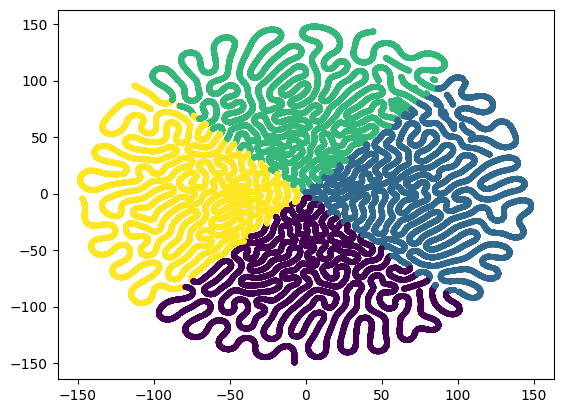

In [66]:
kmeans = KMeans(n_clusters=4).fit(df_tsne_numerical)
plt.scatter(df_tsne_numerical[:, 0], df_tsne_numerical[:, 1], s=10, c=kmeans.labels_)

In [67]:
inertia = []
silhouette = []
N = 10
for k in range(2, N):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_tsne_numerical)
    preds = kmeans.predict(df_tsne_numerical)
    inertia.append(np.sqrt(kmeans.inertia_))
    silhouette.append(silhouette_score(df_tsne_numerical, preds))

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_k

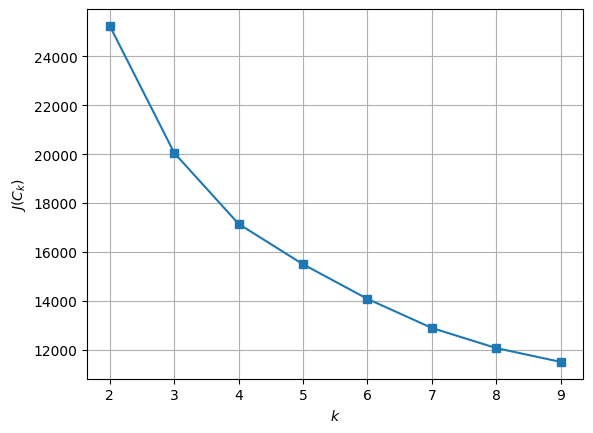

In [68]:
plt.plot(range(2, N), inertia, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

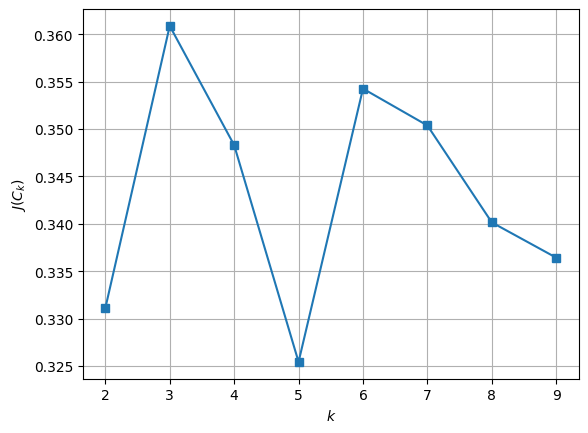

In [69]:
plt.plot(range(2, N), silhouette, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

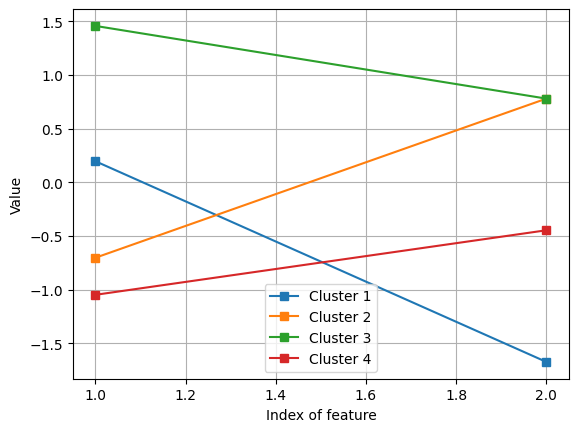

In [71]:
plt.plot(range(1, df_ss_numerical.shape[1]+1), np.median(df_ss_numerical[kmeans.labels_ == 0], axis=0), marker='s', label="Cluster 1");
plt.plot(range(1, df_ss_numerical.shape[1]+1), np.median(df_ss_numerical[kmeans.labels_ == 1], axis=0), marker='s', label="Cluster 2");
plt.plot(range(1, df_ss_numerical.shape[1]+1), np.median(df_ss_numerical[kmeans.labels_ == 2], axis=0), marker='s', label="Cluster 3");
plt.plot(range(1, df_ss_numerical.shape[1]+1), np.median(df_ss_numerical[kmeans.labels_ == 3], axis=0), marker='s', label="Cluster 4");

plt.legend()
plt.xlabel('Index of feature')
plt.grid()
plt.ylabel('Value');

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


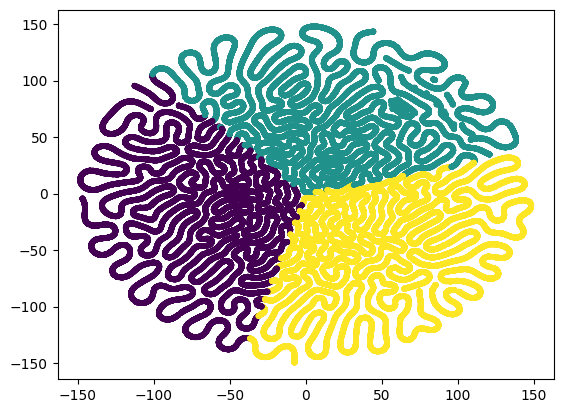

In [72]:
kmeans = KMeans(n_clusters=3).fit(df_tsne_numerical)
plt.scatter(df_tsne_numerical[:, 0], df_tsne_numerical[:, 1], s=10, c=kmeans.labels_)

C:\Users\user\AppData\Local\Temp\ipykernel_11332\2192006951.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='box', data=df_numerical,


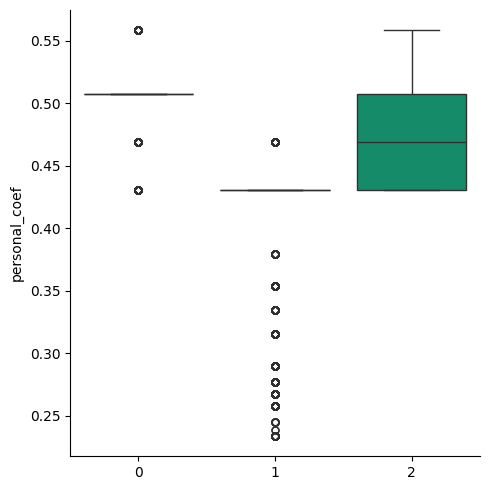

In [84]:
sns.catplot(kind='box', data=df_numerical,
            y='personal_coef',
            x=kmeans.labels_,
            palette="colorblind", sharey=False)
plt.tight_layout()
plt.show()

In [193]:
# обьединение датафрейма с коэффициентами и продажами
result_df5 = df1.merge(df6, on='id')
result_df5

,id,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,dt,number_of_colors,product1
0,0,5.078678,-0.307147,0.959027,0.5072,1499,2.0,0,37,1,Стол
1,0,5.078678,-0.307147,0.959027,0.5072,4799,2.0,0,37,1,Набор
2,3,7.764766,-0.030225,0.794720,0.4304,7199,2.0,0,27,1,Мяч
3,4,4.569378,0.063693,0.820892,0.5072,9199,2.0,0,0,2,Роликовые
4,4,4.569378,0.063693,0.820892,0.5072,4999,2.0,0,0,1,Шлем
...,...,...,...,...,...,...,...,...,...,...,...
271844,177999,7.303172,0.431899,1.317100,0.4304,25199,2.0,1,39,1,Велосипед
271845,177999,7.303172,0.431899,1.317100,0.4304,5499,2.0,0,39,1,Велокресло
271846,177999,7.303172,0.431899,1.317100,0.4304,7999,2.0,0,39,1,Палатка
271847,178001,5.241579,0.430391,0.356182,0.2576,4999,2.0,0,13,1,Мини-степпер


In [194]:
# датафрейм с коэффициентами более 0.5
df3_1 = result_df5[result_df5['personal_coef'] > 0.5]
df3_1

,id,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,dt,number_of_colors,product1
0,0,5.078678,-0.307147,0.959027,0.5072,1499,2.0,0,37,1,Стол
1,0,5.078678,-0.307147,0.959027,0.5072,4799,2.0,0,37,1,Набор
3,4,4.569378,0.063693,0.820892,0.5072,9199,2.0,0,0,2,Роликовые
4,4,4.569378,0.063693,0.820892,0.5072,4999,2.0,0,0,1,Шлем
5,4,4.569378,0.063693,0.820892,0.5072,6999,2.0,0,1,1,Роликовые
...,...,...,...,...,...,...,...,...,...,...,...
271827,177985,4.469696,0.151756,1.524607,0.5584,4699,2.0,0,53,2,Сабо
271836,177997,4.349556,-0.190187,0.635467,0.5072,2399,2.0,0,13,3,Сумка
271837,177997,4.349556,-0.190187,0.635467,0.5072,5999,2.0,0,16,2,Самокат
271838,177998,4.740988,0.364797,1.165888,0.5072,4199,2.0,1,9,2,Кроссовки


In [201]:
word_counts = df3_1['product1'].value_counts()

In [203]:
word_counts_sorted = word_counts.sort_values(ascending=False)
word_counts_sorted.head(20)

Кроссовки      8568
Рюкзак         4662
Сандалии       4544
Футболка       3562
Бейсболка      3405
Носки          3141
Сумка          3121
Брюки          2994
Велосипед      2981
Спортивный     2910
Шорты          2872
Куртка         2724
Кеды           2412
Набор          2301
Палатка        2224
Шлепанцы       2068
Худи           2000
Сабо           1856
Мяч            1714
Полуботинки    1508
Name: product1, dtype: int64

In [107]:
# датафрейм с коэффициентами более 0.5 кто покупал без дисконта
df3_1_0 = df3_1[df3_1['base_sale'] == 0]
df3_1_0

,id,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,dt,number_of_colors,product1
0,0,5.078678,-0.307147,0.959027,0.5072,1499,2.0,0,37,1,Стол
1,0,5.078678,-0.307147,0.959027,0.5072,4799,2.0,0,37,1,Набор
3,4,4.569378,0.063693,0.820892,0.5072,9199,2.0,0,0,2,Роликовые
4,4,4.569378,0.063693,0.820892,0.5072,4999,2.0,0,0,1,Шлем
5,4,4.569378,0.063693,0.820892,0.5072,6999,2.0,0,1,1,Роликовые
...,...,...,...,...,...,...,...,...,...,...,...
271825,177985,4.469696,0.151756,1.524607,0.5584,3199,2.0,0,14,3,Сандалии
271826,177985,4.469696,0.151756,1.524607,0.5584,3299,2.0,0,53,2,Сандалии
271827,177985,4.469696,0.151756,1.524607,0.5584,4699,2.0,0,53,2,Сабо
271836,177997,4.349556,-0.190187,0.635467,0.5072,2399,2.0,0,13,3,Сумка


In [97]:
df3_1_0['cost'].sum()

357721302

In [121]:
result_df3_1_0 = df3_1_0[['cost', 'id']].groupby(['id']).sum()
result_df3_1_0

,cost
id,
0,6298
4,28094
7,22394
9,35999
11,1399
...,...
177964,999
177965,5696
177983,3446


In [108]:
# датафрейм с коэффициентами более 0.5 кто покупал с дисконтом
df3_1_1 = df3_1[df3_1['base_sale'] == 1]
df3_1_1

,id,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,dt,number_of_colors,product1
17,7,5.188231,-0.000134,0.944113,0.5072,1299,2.0,1,35,3,Футболка
33,20,4.831469,-0.285464,1.380620,0.5072,5849,2.0,1,5,1,Лодка
35,20,4.831469,-0.285464,1.380620,0.5072,5849,2.0,1,6,1,Лодка
38,20,4.831469,-0.285464,1.380620,0.5072,5849,2.0,1,9,1,Лодка
46,32,5.729537,0.338093,0.915924,0.5072,724,2.0,1,57,1,Панама
...,...,...,...,...,...,...,...,...,...,...,...
271784,177964,5.033287,0.337177,0.536672,0.5072,2994,2.0,1,58,1,Рюкзак
271813,177981,5.067670,-0.185707,1.040655,0.5072,1609,2.0,1,8,1,Рюкзак
271814,177981,5.067670,-0.185707,1.040655,0.5072,1049,2.0,1,12,2,Сумка
271838,177998,4.740988,0.364797,1.165888,0.5072,4199,2.0,1,9,2,Кроссовки


In [98]:
df3_1_1['cost'].sum()

99612284

In [120]:
result_df3_1_1 = df3_1_1[['cost', 'id']].groupby(['id']).sum()
result_df3_1_1

,cost
id,
7,1299
20,17547
32,724
36,5599
44,2313
...,...
177938,20999
177949,3289
177964,6187


In [88]:
# датафрейм с коэффициентами более 0.45 и менее 0.5
df3_2 = result_df5[(result_df5['personal_coef'] > 0.45) & (result_df5['personal_coef'] < 0.5)]
df3_2

,id,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,dt,number_of_colors,product1
62,45,6.943642,0.328721,1.264989,0.4688,2199,2.0,0,14,1,Шорты
132,91,6.895480,-0.368118,1.382507,0.4688,6999,2.0,0,9,1,Палатка
133,91,6.895480,-0.368118,1.382507,0.4688,9899,2.0,0,9,1,Тент
134,91,6.895480,-0.368118,1.382507,0.4688,22999,2.0,0,10,1,Палатка
135,91,6.895480,-0.368118,1.382507,0.4688,1889,2.0,1,48,1,Полуботинки
...,...,...,...,...,...,...,...,...,...,...,...
271799,177967,7.226242,0.019520,1.390259,0.4688,2999,2.0,0,17,1,Насос
271800,177967,7.226242,0.019520,1.390259,0.4688,3999,2.0,0,17,1,Шлем
271801,177967,7.226242,0.019520,1.390259,0.4688,5599,2.0,0,17,1,Замок
271804,177971,7.446434,-0.311180,1.022236,0.4688,999,2.0,0,23,1,Ракетка


In [204]:
word_counts2 = df3_2['product1'].value_counts()

In [205]:
word_counts_sorted2 = word_counts2.sort_values(ascending=False)
word_counts_sorted2.head(20)

Велосипед         1927
Мяч               1213
Рюкзак            1199
Носки             1115
Сумка             1084
Бейсболка         1074
Кроссовки          861
Палатка            774
Набор              740
Сабо               563
Солнцезащитные     527
Перчатки           511
Спальный           400
Коврик             369
Футболка           367
Шлепанцы           352
Кеды               301
Шорты              297
Панама             292
Худи               278
Name: product1, dtype: int64

In [109]:
# датафрейм с коэффициентами более 0.45 и менее 0.5 кто покупал без дисконта
df3_2_0 = df3_2[df3_2['base_sale'] == 0]
df3_2_0

,id,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,dt,number_of_colors,product1
62,45,6.943642,0.328721,1.264989,0.4688,2199,2.0,0,14,1,Шорты
132,91,6.895480,-0.368118,1.382507,0.4688,6999,2.0,0,9,1,Палатка
133,91,6.895480,-0.368118,1.382507,0.4688,9899,2.0,0,9,1,Тент
134,91,6.895480,-0.368118,1.382507,0.4688,22999,2.0,0,10,1,Палатка
155,103,7.315461,0.236032,0.921831,0.4688,2199,2.0,0,44,1,Мяч
...,...,...,...,...,...,...,...,...,...,...,...
271799,177967,7.226242,0.019520,1.390259,0.4688,2999,2.0,0,17,1,Насос
271800,177967,7.226242,0.019520,1.390259,0.4688,3999,2.0,0,17,1,Шлем
271801,177967,7.226242,0.019520,1.390259,0.4688,5599,2.0,0,17,1,Замок
271804,177971,7.446434,-0.311180,1.022236,0.4688,999,2.0,0,23,1,Ракетка


In [100]:
df3_2_0['cost'].sum()

187002236

In [119]:
result_df3_2_0 = df3_2_0[['cost', 'id']].groupby(['id']).sum()
result_df3_2_0

,cost
id,
45,2199
91,39897
103,2199
126,41595
127,6898
...,...
177942,33498
177955,3997
177967,81189


In [110]:
# датафрейм с коэффициентами более 0.45 и менее 0.5 кто покупал с дисконтом
df3_2_1 = df3_2[df3_2['base_sale'] == 1]
df3_2_1

,id,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,dt,number_of_colors,product1
135,91,6.895480,-0.368118,1.382507,0.4688,1889,2.0,1,48,1,Полуботинки
154,103,7.315461,0.236032,0.921831,0.4688,2309,2.0,1,12,1,Бутсы
195,126,7.291858,0.266452,0.805890,0.4688,949,2.0,1,12,1,Панама
199,126,7.291858,0.266452,0.805890,0.4688,949,2.0,1,18,1,Панама
201,126,7.291858,0.266452,0.805890,0.4688,949,2.0,1,27,1,Панама
...,...,...,...,...,...,...,...,...,...,...,...
271390,177681,7.176196,0.571289,0.734841,0.4688,4299,2.0,1,55,1,Ботинки
271771,177955,6.806084,0.168819,0.862413,0.4688,1819,2.0,1,4,1,Сумка
271774,177955,6.806084,0.168819,0.862413,0.4688,1499,2.0,1,6,1,Худи
271776,177955,6.806084,0.168819,0.862413,0.4688,1609,2.0,1,45,1,Шорты


In [101]:
df3_2_1['cost'].sum()

25763115

In [118]:
result_df3_2_1 = df3_2_1[['cost', 'id']].groupby(['id']).sum()
result_df3_2_1

,cost
id,
91,1889
103,2309
126,2847
189,2589
193,2499
...,...
177502,1679
177565,2508
177674,2499


In [111]:
# датафрейм с коэффициентами менее 0.45
df3_3 = result_df5[result_df5['personal_coef'] < 0.45]
df3_3

,id,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,dt,number_of_colors,product1
2,3,7.764766,-0.030225,0.794720,0.4304,7199,2.0,0,27,1,Мяч
9,6,8.150379,0.075200,0.836140,0.4304,4999,2.0,0,1,2,Кроссовки
10,6,8.150379,0.075200,0.836140,0.4304,1119,2.0,1,11,1,Бейсболка
11,6,8.150379,0.075200,0.836140,0.4304,299,2.0,0,11,2,Носки
12,6,8.150379,0.075200,0.836140,0.4304,3449,2.0,1,29,1,Ботинки
...,...,...,...,...,...,...,...,...,...,...,...
271843,177999,7.303172,0.431899,1.317100,0.4304,20699,2.0,1,32,2,Велосипед
271844,177999,7.303172,0.431899,1.317100,0.4304,25199,2.0,1,39,1,Велосипед
271845,177999,7.303172,0.431899,1.317100,0.4304,5499,2.0,0,39,1,Велокресло
271846,177999,7.303172,0.431899,1.317100,0.4304,7999,2.0,0,39,1,Палатка


In [206]:
word_counts3 = df3_3['product1'].value_counts()

In [207]:
word_counts_sorted3 = word_counts3.sort_values(ascending=False)
word_counts_sorted3.head(20)

Велосипед         7509
Рюкзак            5310
Бейсболка         4726
Носки             4223
Кроссовки         4174
Сумка             4071
Палатка           3999
Набор             3760
Мяч               3000
Солнцезащитные    2387
Сабо              2249
Коврик            2066
Спальный          2040
Перчатки          1666
Сандалии          1653
Футболка          1629
Шлепанцы          1543
Самокат           1327
Шорты             1263
Панама            1207
Name: product1, dtype: int64

In [112]:
# датафрейм с коэффициентами менее 0.45 кто покупал без дисконта
df3_3_0 = df3_3[df3_3['base_sale'] == 0]
df3_3_0

,id,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,dt,number_of_colors,product1
2,3,7.764766,-0.030225,0.794720,0.4304,7199,2.0,0,27,1,Мяч
9,6,8.150379,0.075200,0.836140,0.4304,4999,2.0,0,1,2,Кроссовки
11,6,8.150379,0.075200,0.836140,0.4304,299,2.0,0,11,2,Носки
23,12,7.974965,-0.150779,0.839112,0.4304,26999,2.0,0,4,2,Велосипед
24,12,7.974965,-0.150779,0.839112,0.4304,26999,2.0,0,51,2,Велосипед
...,...,...,...,...,...,...,...,...,...,...,...
271841,177999,7.303172,0.431899,1.317100,0.4304,1199,2.0,0,1,1,Лопата
271842,177999,7.303172,0.431899,1.317100,0.4304,11999,2.0,0,1,1,Сноуборд
271845,177999,7.303172,0.431899,1.317100,0.4304,5499,2.0,0,39,1,Велокресло
271846,177999,7.303172,0.431899,1.317100,0.4304,7999,2.0,0,39,1,Палатка


In [102]:
df3_3_0['cost'].sum()

789309490

In [117]:
result_df3_3_0 = df3_3_0[['cost', 'id']].groupby(['id']).sum()
result_df3_3_0

,cost
id,
3,7199
6,5298
12,53998
24,10596
26,999
...,...
177982,7045
177991,6398
177995,11594


In [113]:
# датафрейм с коэффициентами менее 0.45 кто покупал с дисконтом
df3_3_1 = df3_3[df3_3['base_sale'] == 1]
df3_3_1

,id,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,dt,number_of_colors,product1
10,6,8.150379,0.075200,0.836140,0.4304,1119,2.0,1,11,1,Бейсболка
12,6,8.150379,0.075200,0.836140,0.4304,3449,2.0,1,29,1,Ботинки
13,6,8.150379,0.075200,0.836140,0.4304,2599,2.0,1,29,2,Кроссовки
74,57,7.199478,-0.229737,0.849205,0.2672,2639,2.0,1,1,1,Кроссовки
79,57,7.199478,-0.229737,0.849205,0.2672,519,2.0,1,40,2,Сумка
...,...,...,...,...,...,...,...,...,...,...,...
271767,177952,7.871063,0.009518,1.426682,0.4304,1439,2.0,1,32,1,Машинка
271802,177970,7.328587,-0.373613,1.300590,0.4304,1349,2.0,1,18,1,Свитшот
271803,177970,7.328587,-0.373613,1.300590,0.4304,2589,2.0,1,18,1,Худи
271843,177999,7.303172,0.431899,1.317100,0.4304,20699,2.0,1,32,2,Велосипед


In [103]:
df3_3_1['cost'].sum()

123162015

In [116]:
result_df3_3_1 = df3_3_1[['cost', 'id']].groupby(['id']).sum()
result_df3_3_1

,cost
id,
6,7167
57,3158
59,314
67,17430
93,5698
...,...
177922,445
177929,1749
177952,1439


# вывод: дисконт не повлиял ни на общую сумму продожи ни на число покупателей, во всех кластерах покупателей.

# Модель склонности клиента к покупке. 

In [309]:

result_df5 = x10.merge(df6, on='id')
result_df5

,id,age,city,country,education1,cost,product_sex,base_sale,dt,number_of_colors,product1
0,0,36,1201,32,1,1499,2.0,0,37,1,Стол
1,0,36,1201,32,1,4799,2.0,0,37,1,Набор
2,4,35,1134,32,1,9199,2.0,0,0,2,Роликовые
3,4,35,1134,32,1,4999,2.0,0,0,1,Шлем
4,4,35,1134,32,1,6999,2.0,0,1,1,Роликовые
...,...,...,...,...,...,...,...,...,...,...,...
231893,177999,34,1163,32,1,25199,2.0,1,39,1,Велосипед
231894,177999,34,1163,32,1,5499,2.0,0,39,1,Велокресло
231895,177999,34,1163,32,1,7999,2.0,0,39,1,Палатка
231896,178001,5,1208,32,1,4999,2.0,0,13,1,Мини-степпер


In [310]:

result_df6 = df1.merge(result_df5, on='id')
result_df6

,id,lbt_coef,ac_coef,sm_coef,personal_coef,age,city,country,education1,cost,product_sex,base_sale,dt,number_of_colors,product1
0,0,5.078678,-0.307147,0.959027,0.5072,36,1201,32,1,1499,2.0,0,37,1,Стол
1,0,5.078678,-0.307147,0.959027,0.5072,36,1201,32,1,4799,2.0,0,37,1,Набор
2,4,4.569378,0.063693,0.820892,0.5072,35,1134,32,1,9199,2.0,0,0,2,Роликовые
3,4,4.569378,0.063693,0.820892,0.5072,35,1134,32,1,4999,2.0,0,0,1,Шлем
4,4,4.569378,0.063693,0.820892,0.5072,35,1134,32,1,6999,2.0,0,1,1,Роликовые
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231893,177999,7.303172,0.431899,1.317100,0.4304,34,1163,32,1,25199,2.0,1,39,1,Велосипед
231894,177999,7.303172,0.431899,1.317100,0.4304,34,1163,32,1,5499,2.0,0,39,1,Велокресло
231895,177999,7.303172,0.431899,1.317100,0.4304,34,1163,32,1,7999,2.0,0,39,1,Палатка
231896,178001,5.241579,0.430391,0.356182,0.2576,5,1208,32,1,4999,2.0,0,13,1,Мини-степпер


In [367]:
result_df6_1 = result_df6[result_df6['city'] == 1188]
result_df6_1

,id,lbt_coef,ac_coef,sm_coef,personal_coef,age,city,country,education1,cost,product_sex,base_sale,dt,number_of_colors,product1
8,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,4999,2.0,0,1,2,Кроссовки
9,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,1119,2.0,1,11,1,Бейсболка
10,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,299,2.0,0,11,2,Носки
11,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,3449,2.0,1,29,1,Ботинки
12,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,2599,2.0,1,29,2,Кроссовки
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231881,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,1399,2.0,0,24,1,Бутсы
231882,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,4199,2.0,0,53,1,Кроссовки
231883,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,1599,2.0,0,56,1,Бутсы
231884,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,1599,2.0,0,57,1,Бутсы


In [368]:
result_df6_1 = result_df6_1[result_df6_1['dt'] != 0]
result_df6_1

,id,lbt_coef,ac_coef,sm_coef,personal_coef,age,city,country,education1,cost,product_sex,base_sale,dt,number_of_colors,product1
8,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,4999,2.0,0,1,2,Кроссовки
9,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,1119,2.0,1,11,1,Бейсболка
10,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,299,2.0,0,11,2,Носки
11,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,3449,2.0,1,29,1,Ботинки
12,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,2599,2.0,1,29,2,Кроссовки
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231881,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,1399,2.0,0,24,1,Бутсы
231882,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,4199,2.0,0,53,1,Кроссовки
231883,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,1599,2.0,0,56,1,Бутсы
231884,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,1599,2.0,0,57,1,Бутсы


In [369]:
word_counts7 = result_df6_1['product1'].value_counts()
word_counts_sorted7 = word_counts7.sort_values(ascending=False)
word_counts_sorted7

Кроссовки        1206
Рюкзак           1100
Велосипед        1055
Бейсболка         861
Носки             827
                 ... 
Эластичный          1
Детское             1
Парус               1
Суппорты            1
Жиросжигатель       1
Name: product1, Length: 686, dtype: int64

In [370]:
result_df6_1['purchase'] = result_df6_1['dt']
result_df6_1

C:\Users\user\AppData\Local\Temp\ipykernel_6492\1251331174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df6_1['purchase'] = result_df6_1['dt']


,id,lbt_coef,ac_coef,sm_coef,personal_coef,age,city,country,education1,cost,product_sex,base_sale,dt,number_of_colors,product1,purchase
8,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,4999,2.0,0,1,2,Кроссовки,1
9,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,1119,2.0,1,11,1,Бейсболка,11
10,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,299,2.0,0,11,2,Носки,11
11,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,3449,2.0,1,29,1,Ботинки,29
12,6,8.150379,0.075200,0.836140,0.4304,52,1188,32,1,2599,2.0,1,29,2,Кроссовки,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231881,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,1399,2.0,0,24,1,Бутсы,24
231882,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,4199,2.0,0,53,1,Кроссовки,53
231883,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,1599,2.0,0,56,1,Бутсы,56
231884,177995,7.533065,0.422229,1.094511,0.4304,39,1188,32,1,1599,2.0,0,57,1,Бутсы,57


In [371]:
columns_for_drop = ['lbt_coef', 'ac_coef', 'sm_coef', 'city', 'country', 'cost', 'dt']

result_df6_1_1 = result_df6_1.drop(columns=columns_for_drop)
result_df6_1_1

,id,personal_coef,age,education1,product_sex,base_sale,number_of_colors,product1,purchase
8,6,0.4304,52,1,2.0,0,2,Кроссовки,1
9,6,0.4304,52,1,2.0,1,1,Бейсболка,11
10,6,0.4304,52,1,2.0,0,2,Носки,11
11,6,0.4304,52,1,2.0,1,1,Ботинки,29
12,6,0.4304,52,1,2.0,1,2,Кроссовки,29
...,...,...,...,...,...,...,...,...,...
231881,177995,0.4304,39,1,2.0,0,1,Бутсы,24
231882,177995,0.4304,39,1,2.0,0,1,Кроссовки,53
231883,177995,0.4304,39,1,2.0,0,1,Бутсы,56
231884,177995,0.4304,39,1,2.0,0,1,Бутсы,57


In [372]:
counts2 = result_df6_1['id'].value_counts().sort_values(ascending=False)


In [373]:
counts4 = counts2.loc[(counts2 == 1)].index
counts4

Int64Index([ 41553,   2628,  20909,  78435,  12737, 102837,  52927, 132930,
             76226,  68038,
            ...
            155573,  98225, 122995,  86133, 111252,  37117, 108810, 158524,
             88324,   2049],
           dtype='int64', length=2506)

In [374]:
result_df6_1_2 = result_df6_1_1.groupby(['id', 'personal_coef', 'education1', 'base_sale', 'product_sex','number_of_colors', 'age', 'product1']).sum("purchase").sort_values(["purchase"], ascending=False)
result_df6_1_2

purchase
id    personal_coef education1 base_sale product_sex number_of_colors age product1           
16910 0.4304        1          0         2.0         1                67  Мюсли           644
                                                                          Спальный        575
19747 0.4304        1          0         2.0         2                27  Очки            536
79627 0.4304        1          1         2.0         1                36  Панама          477
                                                                          Круизер         471
...                                                                                       ...
83744 0.5072        1          0         2.0         2                41  Брюки             1
                                                     1                41  Шорты             1
                                                                          Бейсболка         1
82539 0.5072        1          1         2.0         2                45  Куртка            1
6     0.4304        1          0         2.0         2                52  Кроссовки         1

[21074 rows x 1 columns]

In [375]:
result_df6_1_2.loc[counts4, 'purchase'] = 1

In [376]:
result_df6_1_2.loc[(result_df6_1_2.purchase > 1), 'purchase'] = 2
result_df6_1_2.purchase.value_counts(dropna=False)

2    18155
1     2919
Name: purchase, dtype: int64

In [377]:
result_df6_1_2

purchase
id    personal_coef education1 base_sale product_sex number_of_colors age product1           
16910 0.4304        1          0         2.0         1                67  Мюсли             2
                                                                          Спальный          2
19747 0.4304        1          0         2.0         2                27  Очки              2
79627 0.4304        1          1         2.0         1                36  Панама            2
                                                                          Круизер           2
...                                                                                       ...
83744 0.5072        1          0         2.0         2                41  Брюки             1
                                                     1                41  Шорты             1
                                                                          Бейсболка         1
82539 0.5072        1          1         2.0         2                45  Куртка            1
6     0.4304        1          0         2.0         2                52  Кроссовки         1

[21074 rows x 1 columns]

In [378]:
result_df6_1_3 = result_df6_1_2.reset_index()
result_df6_1_3

,id,personal_coef,education1,base_sale,product_sex,number_of_colors,age,product1,purchase
0,16910,0.4304,1,0,2.0,1,67,Мюсли,2
1,16910,0.4304,1,0,2.0,1,67,Спальный,2
2,19747,0.4304,1,0,2.0,2,27,Очки,2
3,79627,0.4304,1,1,2.0,1,36,Панама,2
4,79627,0.4304,1,1,2.0,1,36,Круизер,2
...,...,...,...,...,...,...,...,...,...
21069,83744,0.5072,1,0,2.0,2,41,Брюки,1
21070,83744,0.5072,1,0,2.0,1,41,Шорты,1
21071,83744,0.5072,1,0,2.0,1,41,Бейсболка,1
21072,82539,0.5072,1,1,2.0,2,45,Куртка,1


In [379]:
columns_for_drop2 = ['id']

result_df6_1_3 = result_df6_1_3.drop(columns=columns_for_drop2)
result_df6_1_3

,personal_coef,education1,base_sale,product_sex,number_of_colors,age,product1,purchase
0,0.4304,1,0,2.0,1,67,Мюсли,2
1,0.4304,1,0,2.0,1,67,Спальный,2
2,0.4304,1,0,2.0,2,27,Очки,2
3,0.4304,1,1,2.0,1,36,Панама,2
4,0.4304,1,1,2.0,1,36,Круизер,2
...,...,...,...,...,...,...,...,...
21069,0.5072,1,0,2.0,2,41,Брюки,1
21070,0.5072,1,0,2.0,1,41,Шорты,1
21071,0.5072,1,0,2.0,1,41,Бейсболка,1
21072,0.5072,1,1,2.0,2,45,Куртка,1


In [329]:
result_df6_1_4 = result_df6_1_3['product1']
result_df6_1_4

0            Мюсли
1         Спальный
2             Очки
3           Панама
4          Круизер
           ...    
21069        Брюки
21070        Шорты
21071    Бейсболка
21072       Куртка
21073    Кроссовки
Name: product1, Length: 21074, dtype: object

In [330]:
# Кодировка категориальных признаков
lab3 = LabelEncoder()
lab3

LabelEncoder()

In [331]:
lab3.fit(result_df6_1_4)

LabelEncoder()

In [332]:
lab_result_df6_1_4 = lab3.transform(result_df6_1_4)
lab_result_df6_1_4

array([323, 521, 384, ...,  39, 256, 246])

In [333]:
result_df6_1_3['product2'] = lab_result_df6_1_4
result_df6_1_3.head()

,personal_coef,education1,base_sale,product_sex,number_of_colors,age,product1,purchase,product2
0,0.4304,1,0,2.0,1,67,Мюсли,2,323
1,0.4304,1,0,2.0,1,67,Спальный,2,521
2,0.4304,1,0,2.0,2,27,Очки,2,384
3,0.4304,1,1,2.0,1,36,Панама,2,391
4,0.4304,1,1,2.0,1,36,Круизер,2,251


In [334]:
columns_for_drop3 = ['product1']
result_df6_1_3 = result_df6_1_3.drop(columns=columns_for_drop3)
result_df6_1_3

,personal_coef,education1,base_sale,product_sex,number_of_colors,age,purchase,product2
0,0.4304,1,0,2.0,1,67,2,323
1,0.4304,1,0,2.0,1,67,2,521
2,0.4304,1,0,2.0,2,27,2,384
3,0.4304,1,1,2.0,1,36,2,391
4,0.4304,1,1,2.0,1,36,2,251
...,...,...,...,...,...,...,...,...
21069,0.5072,1,0,2.0,2,41,1,64
21070,0.5072,1,0,2.0,1,41,1,664
21071,0.5072,1,0,2.0,1,41,1,39
21072,0.5072,1,1,2.0,2,45,1,256


In [335]:
word_counts5 = result_df6_1_3['product2'].value_counts()

In [336]:
word_counts_sorted5 = word_counts5.sort_values(ascending=False)
word_counts_sorted5.head(10)

246    1023
477     867
76      841
368     686
39      670
551     636
327     582
387     517
487     506
483     399
Name: product2, dtype: int64

In [337]:
result_df6_1_4 = result_df6_1_3[result_df6_1_3['purchase'] == 2]
result_df6_1_4

,personal_coef,education1,base_sale,product_sex,number_of_colors,age,purchase,product2
0,0.4304,1,0,2.0,1,67,2,323
1,0.4304,1,0,2.0,1,67,2,521
2,0.4304,1,0,2.0,2,27,2,384
3,0.4304,1,1,2.0,1,36,2,391
4,0.4304,1,1,2.0,1,36,2,251
...,...,...,...,...,...,...,...,...
20587,0.5072,1,0,2.0,1,50,2,519
20588,0.4304,1,0,2.0,1,33,2,211
20589,0.5072,1,1,2.0,1,50,2,384
20590,0.5072,1,0,2.0,1,43,2,62


In [338]:
y1 = result_df6_1_4['purchase']
x1 = result_df6_1_4.loc[:, result_df6_1_4.columns != 'purchase']

In [339]:
result_df6_1_5 = result_df6_1_3[result_df6_1_3['purchase'] == 1]
result_df6_1_5

,personal_coef,education1,base_sale,product_sex,number_of_colors,age,purchase,product2
1155,0.5072,1,1,2.0,1,41,1,487
1163,0.4304,1,1,2.0,1,51,1,477
1180,0.4304,1,1,2.0,1,36,1,387
1183,0.5072,1,0,2.0,1,60,1,471
1189,0.4304,1,0,2.0,1,33,1,76
...,...,...,...,...,...,...,...,...
21069,0.5072,1,0,2.0,2,41,1,64
21070,0.5072,1,0,2.0,1,41,1,664
21071,0.5072,1,0,2.0,1,41,1,39
21072,0.5072,1,1,2.0,2,45,1,256


In [340]:
y2 = result_df6_1_5['purchase']
x2 = result_df6_1_5.loc[:, result_df6_1_5.columns != 'purchase']

In [341]:
from sklearn.model_selection import train_test_split


# Разделение данных на обучающий и тестовый наборы
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.30, random_state=42)

In [342]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.30, random_state=42)

In [343]:
X_train7 = pd.concat([X_train1, X_train2])


In [344]:
X_test7 = pd.concat([X_test1, X_test2])

In [345]:
y_train7 = pd.concat([y_train1, y_train2])

In [346]:
y_test7 = pd.concat([y_test1, y_test2])

In [347]:
sc7 = MinMaxScaler()
X_train7_sc7 = sc7.fit_transform(X_train7)

In [348]:
X_train7_sc7

array([[0.57446809, 1.        , 0.        , ..., 0.        , 0.45833333,
        0.70614035],
       [0.82978723, 1.        , 1.        , ..., 0.        , 0.51388889,
        0.91812865],
       [0.70212766, 0.        , 0.        , ..., 0.        , 0.25      ,
        0.68274854],
       ...,
       [0.57446809, 1.        , 0.        , ..., 0.        , 0.38888889,
        0.91812865],
       [0.57446809, 1.        , 0.        , ..., 0.        , 0.34722222,
        0.11111111],
       [0.57446809, 1.        , 0.        , ..., 0.        , 0.45833333,
        0.70906433]])

In [349]:
sc7 = MinMaxScaler()
X_test7_sc7 = sc7.fit_transform(X_test7)

In [258]:
X_test7_sc7

array([[0.84236453, 1.        , 0.        , ..., 0.        , 0.5       ,
        0.22645503],
       [1.        , 0.        , 0.        , ..., 0.        , 0.26388889,
        0.58941799],
       [0.10344828, 0.        , 0.        , ..., 0.        , 0.18055556,
        0.94920635],
       ...,
       [0.84236453, 1.        , 1.        , ..., 0.25      , 0.47222222,
        0.69312169],
       [0.60591133, 1.        , 0.        , ..., 0.25      , 0.43055556,
        0.35978836],
       [0.60591133, 1.        , 0.        , ..., 0.        , 0.63888889,
        0.53968254]])

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Обучение модели логистической регрессии
model_7 = LogisticRegression()
model_7.fit(X_train7_sc7, y_train7)

# Предсказание на обучающем наборе
predictions7 = model_7.predict(X_train7_sc7)

# Оценка точности модели
accuracy7 = accuracy_score(y_train7, predictions7)
print("Accuracy логистической регрессии:", accuracy7)

Accuracy логистической регрессии: 0.8615009151921904


In [351]:
# Предсказание на тестовом наборе
predictions7_1 = model_7.predict(X_test7_sc7)

# Оценка точности модели
accuracy7_1 = accuracy_score(y_test7, predictions7_1)
print("Accuracy логистической регрессии:", accuracy7_1)

Accuracy логистической регрессии: 0.8614581685908588


In [352]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели случайного леса
model_7_1 = RandomForestClassifier(min_samples_split=15, min_samples_leaf=2)
model_7_1.fit(X_train7_sc7, y_train7)

# Предсказание на обучающем наборе
predictions7_1_1 = model_7_1.predict(X_train7_sc7)

# Оценка точности модели
accuracy7_1_1 = accuracy_score(y_train7, predictions7_1_1)
print("Accuracy случайного леса:", accuracy7_1_1)

Accuracy случайного леса: 0.863399091587011


In [353]:
# Предсказание на тестовом наборе
predictions7_1_2 = model_7_1.predict(X_test7_sc7)

# Оценка точности модели
accuracy7_1_2 = accuracy_score(y_test7, predictions7_1_2)
print("Accuracy случайного леса:", accuracy7_1_2)

Accuracy случайного леса: 0.8611418630396963
